<a href="https://colab.research.google.com/github/enyeneraph/AVIATION-AIRPLANE-FLIGHTS/blob/main/Members/Enyene/Datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the necessary libraries for the project**#

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [175]:
airplane_dataset = pd.read_csv('https://raw.githubusercontent.com/enyeneraph/AVIATION-AIRPLANE-FLIGHTS/main/Airplane_crashes_dataset_since_1908.csv', parse_dates= ["date"])

In [ ]:
airplane_dataset.sample(5)

# **Data Cleaning/Processing**

###**Dropping unnecessary columns**

**I believe the flight_no, registration, cn/In columns are not necessary to our project.So they will be dropped.**



In [177]:
#Dropping the flight_no, registration, cn/In columns.

airplane_dataset.drop(columns=['registration', 'flight_no', 'cn_ln'], inplace=True)

###**Checking for duplicate values in the dataset**###



In [178]:
airplane_dataset.duplicated().sum()

0

**There are no duplicate entries in the dataset**

### **Cleaning the Columns**

In [179]:
#null values are represented as '?' in the dataset, so we are going to change that to pandas' NaN
#First, lets see how many '?' values are in the dataset
airplane_dataset[airplane_dataset == '?'].count()

date                       0
time                    1504
location                   5
operator                  10
route                    762
ac_type                   13
all_aboard                17
passengers_aboard        221
crew_aboard              219
all_fatalities             8
passenger_fatalities     235
crew_fatalities          235
ground                    44
summary                   59
dtype: int64

In [180]:
#Now to convert '?' to Nan
airplane_dataset.replace('?', np.nan, inplace=True)

In [256]:
#checking null values
airplane_dataset.isna().sum()

date                       0
time                    1504
location                   5
operator                  10
route                    762
ac_type                   13
all_aboard                17
passengers_aboard        221
crew_aboard              219
all_fatalities             8
passenger_fatalities     235
crew_fatalities          235
ground                    44
summary                   59
countries                  5
year                       0
dtype: int64

In [183]:

#examining and cleaning the operator column
airplane_dataset['operator'].replace({'Military -Royal Air Force':'Military - Royal Air Force'}, inplace= True)

len(airplane_dataset['operator'].unique())
# airplane_dataset['operator'].value_counts().head(50)


2267

#**Feature Engineering**

**Extracting country of accident from location**

In [188]:
#extracting country from location

countries = airplane_dataset['location'].str.split(',')
for index, value in countries[countries.notna()].iteritems():
  countries[index] = value[-1]
airplane_dataset['countries'] = countries.str.strip()

In [189]:
airplane_dataset['countries']

0                 Virginia
1                   France
2               New Jersey
3                   Canada
4       Over the North Sea
               ...        
5003                Alaska
5004               Nigeria
5005               Myanmar
5006           Philippines
5007                Russia
Name: countries, Length: 5008, dtype: object

In [190]:
us_regions = ['Alabama', 'Montgomery', 'Alaska','Juneau', 'Arizona', 'Phoenix', 'Arkansas', 'Little Rock', 'California', 'Sacremento','Colorado', 'Denver', 'Connecticut', 'Hartford','Delaware', 'Dover',
'Florida', 'Tallahassee','Georgia', 'Atlanta', 'Hawaii','Honolulu', 'Idaho', 'Boise','Illinois', 'Springfield', 'Indiana', 'Indianapolis', 'Iowa', 'Des Moines', 'Kansas', 'Topeka', 'Kentucky', 'Frankfort', 'Louisiana', 'Baton Rouge',
'Maine', 'Augusta','Maryland', 'Annapolis','Massachusetts', 'Boston','Michigan', 'Lansing', 'Minnesota', 'St. Paul', 'Mississippi', 'Jackson', 'Missouri', 'Jefferson City',
'Montana', 'Helena', 'Nebraska', 'Lincoln', 'Nevada', 'Carson City', 'New Hampshire', 'Concord', 'New Jersey', 'Trenton', 'New Mexico', 'Santa Fe', 'New York', 'Albany','North Carolina', 'Raleigh',
'North Dakota', 'Bismarck', 'Ohio', 'Columbus','Oklahoma', 'Oklahoma City','Oregon', 'Salem','Pennsylvania', 'Harrisburg','Rhode Island', 'Providence','South Carolina', 'Columbia','South Dakota',    'Pierre',
'Tennessee', 'Nashville','Texas', 'Austin', 'Utah', 'Salt Lake City', 'Vermont' , 'Montpelier', 'Virginia', 'Richmond', 'Washington', 'Olympia', 'West Virginia', 'Charleston', 'Wisconsin', 'Madison',
'Wyoming', 'Cheyenne']

In [191]:
#replacing states and capitals of USA in the dataset with 'USA'
airplane_dataset['countries'].replace(us_regions, 'USA', inplace=True)

In [192]:
canada_regions = ['Alberta	Edmonton','British Columbia','Victoria', 'Manitoba', 'Winnipeg', 'Brunswick',	'New Brunswick'	'Fredericton', 'Newfoundland and Labrador', "St. John's"
'Northwest Territories', 'Yellowknife','Nova Scotia','Halifax', 'Nunavut',	'Iqaluit', 'Ontario', 'Toronto', 'Prince Edward Island',	'Charlottetown', 'Quebec',	'Québec City','Saskatchewan','Regina',
'Yukon',	'Whitehorse']

In [193]:
#replacing canada states/capitals with Canada

airplane_dataset['countries'].replace(canada_regions, 'Canada', inplace = True)

In [194]:
#adding year column to dataset
airplane_dataset['year'] = airplane_dataset['date'].dt.year

In [195]:
airplane_dataset['year']

0       1908
1       1909
2       1912
3       1913
4       1913
        ... 
5003    2021
5004    2021
5005    2021
5006    2021
5007    2021
Name: year, Length: 5008, dtype: int64

# **Visualization**

In [ ]:
#growth rate of airplane accidents
accidents_per_year = airplane_dataset.groupby('year')['date'].count().reset_index()
accidents_per_year

Text(0.5, 1.0, 'Airplane accidents per year since 1908')

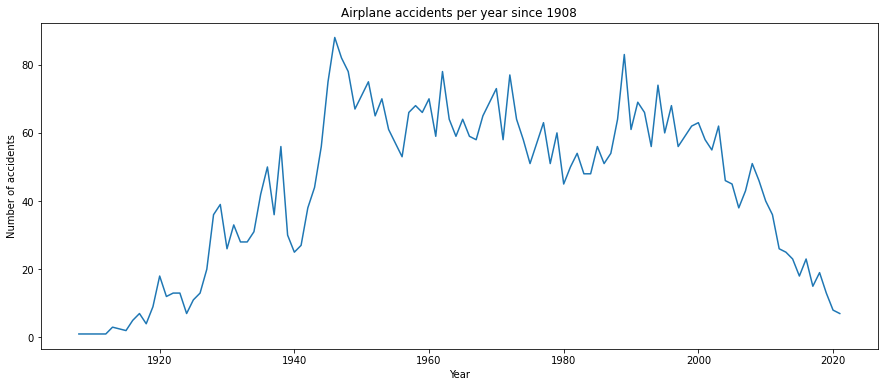

In [220]:

#growth rate of airplane accidents
plt.figure(figsize= (15, 6))
sns.lineplot(x='year', y = 'date', data=accidents_per_year)
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Airplane accidents per year since 1908')


**Countries with the most accidents in the last 21 years**

In [242]:
dataset_from_last_21years = airplane_dataset[airplane_dataset['year'].between(2000, 2021)]
dataset_from_last_21years= dataset_from_last_21years.groupby('countries')['year'].count().reset_index().nlargest(n= 10, columns= 'year')

In [243]:
dataset_from_last_21years

,countries,year
154,USA,117
126,Russia,49
71,Indonesia,35
26,Canada,24
21,Brazil,23
32,Colombia,21
72,Iran,20
35,Congo,19
105,Nepal,16
160,Venezuela,16


Text(0.5, 1.0, 'Top 10 countries with the most accidents in 2000-2021')

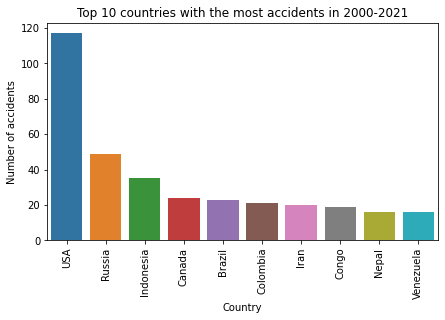

In [251]:
#top 10 countries with most accidents in last_21 years
plt.figure(figsize= (7, 4))
plt.xticks(rotation= 90)
sns.barplot(x='countries', y= 'year', data= dataset_from_last_21years)
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.title('Top 10 countries with the most accidents in 2000-2021')


**Operators with the most accidents**

In [254]:
data = airplane_dataset.groupby('operator')['year'].count().reset_index().nlargest(n=10, columns= 'year')

Text(0.5, 1.0, 'Top 10 operators with the most accidents')

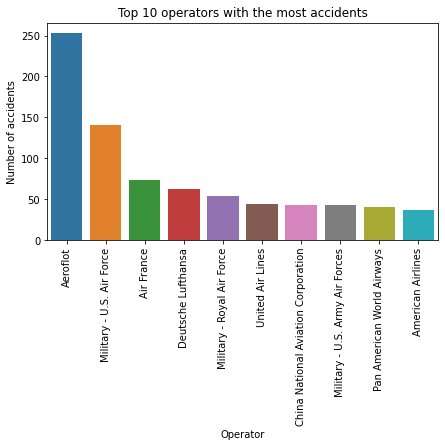

In [255]:
plt.figure(figsize= (7, 4))
plt.xticks(rotation= 90)
sns.barplot(x='operator', y= 'year', data= data)
plt.xlabel('Operator')
plt.ylabel('Number of accidents')
plt.title('Top 10 operators with the most accidents')
